#  GRU (Gated Recurrent Unit)


Uma GRU, ou Gated Recurrent Unit, é um tipo de rede neural recorrente (RNN) que é frequentemente usada em tarefas de previsão de séries temporais, como previsão de preços de ações. Ela é uma variação das redes LSTM (Long Short-Term Memory) e é projetada para superar alguns dos problemas das RNNs tradicionais, como o desaparecimento do gradiente.

Uma GRU possui unidades de memória que podem manter informações de estados anteriores e decide quais informações devem ser atualizadas ou esquecidas com base nos dados de entrada atuais. Isso a torna eficaz na captura de dependências de longo prazo em sequências de dados.

Neste exemplo, usaremos uma GRU para prever os preços de ações da Apple ao longo do tempo.

# Importação das bibliotecas

Nesta célula, importamos as bibliotecas necessárias e definimos os parâmetros, como o ticker da ação e o período desejado para coletar os dados de preços da ação da Apple usando a biblioteca yfinance.

In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

# Defina o ticker da ação e o período desejado
ticker = "AAPL"  # Exemplo: Apple Inc.
start_date = "2010-01-01"
end_date = "2023-09-19"

# Obtenha os dados de preços da ação usando yfinance
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


# Pré-Processamento de Dados

Nesta célula, selecionamos a coluna relevante ('Adj Close'), normalizamos os dados para um intervalo entre 0 e 1 usando o MinMaxScaler e dividimos os dados em conjuntos de treinamento e teste.

In [18]:
# Extraia as colunas relevantes (geralmente 'Adj Close' é usada)
data = data[['Adj Close']]

# Normalização dos dados para um intervalo entre 0 e 1
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data[['Adj Close']])

# Divida os dados em treinamento e teste
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]


<ipython-input-18-8b4b9740da39>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Adj Close'] = scaler.fit_transform(data[['Adj Close']])


# Preparação dos Dados

Nesta célula, definimos uma função prepare_data para preparar os dados de séries temporais para modelagem. Em seguida, aplicamos essa função aos conjuntos de treinamento e teste, especificando o número de etapas de tempo (ou seja, o número de dias anteriores usados para prever o próximo dia).

In [19]:
# Função para preparar os dados para a modelagem
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Defina o número de etapas de tempo e prepare os dados
time_steps = 10  # Você pode ajustar isso conforme necessário
X_train, y_train = prepare_data(train_data.values, time_steps)
X_test, y_test = prepare_data(test_data.values, time_steps)


# Construção do Modelo GRU

Nesta célula, definimos um modelo de rede neural sequencial que inclui uma camada GRU com 50 unidades, uma função de ativação ReLU e uma camada densa com uma única unidade. Também compilamos o modelo especificando o otimizador (Adam) e a função de perda (erro médio quadrático).

In [20]:
# Construa um modelo GRU simples
model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


# Treinamento do Modelo

Nesta célula, treinamos o modelo GRU usando os dados de treinamento. Especificamos o número de épocas (50) e o tamanho do lote (32).

In [21]:
# Treine o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
86/86 [==============================] - 2s 6ms/step - loss: 0.0047
Epoch 2/50
86/86 [==============================] - 1s 6ms/step - loss: 4.1250e-05
Epoch 3/50
86/86 [==============================] - 1s 6ms/step - loss: 4.2567e-05
Epoch 4/50
86/86 [==============================] - 1s 7ms/step - loss: 3.9450e-05
Epoch 5/50
86/86 [==============================] - 1s 7ms/step - loss: 3.9509e-05
Epoch 6/50
86/86 [==============================] - 1s 7ms/step - loss: 3.7555e-05
Epoch 7/50
86/86 [==============================] - 1s 6ms/step - loss: 3.7926e-05
Epoch 8/50
86/86 [==============================] - 1s 6ms/step - loss: 3.7501e-05
Epoch 9/50
86/86 [==============================] - 1s 7ms/step - loss: 3.7818e-05
Epoch 10/50
86/86 [==============================] - 1s 11ms/step - loss: 3.4840e-05
Epoch 11/50
86/86 [==============================] - 1s 12ms/step - loss: 3.5194e-05
Epoch 12/50
86/86 [==============================] - 1s 11ms/step - loss: 3.6559e-05
Ep

#  Previsões e Plotagem dos Resultados



22/22 [==============================] - 0s 4ms/step


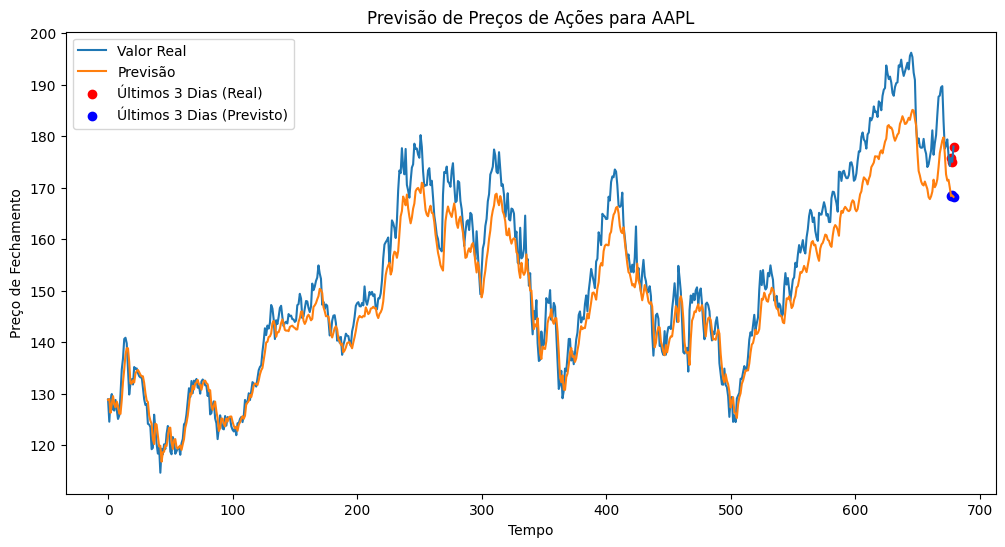

Valores Reais dos 3 Últimos Dias:
[[175.74000549]
 [175.00999451]
 [177.97000122]]
Valores Previstos dos 3 Últimos Dias:
[[168.3825 ]
 [168.49905]
 [168.19713]]


In [22]:
# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Inverta a normalização nas previsões e nos valores reais
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Recupere os valores reais dos 3 últimos dias e as previsões dos 3 últimos dias
last_3_real = y_test[-3:]
last_3_pred = y_pred[-3:]

# Plote os resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valor Real')
plt.plot(y_pred, label='Previsão')
plt.scatter(range(len(y_test) - 3, len(y_test)), last_3_real, c='red', label='Últimos 3 Dias (Real)')
plt.scatter(range(len(y_test) - 3, len(y_test)), last_3_pred, c='blue', label='Últimos 3 Dias (Previsto)')
plt.legend()
plt.title(f'Previsão de Preços de Ações para {ticker}')
plt.xlabel('Tempo')
plt.ylabel('Preço de Fechamento')
plt.show()

# Exibir os valores reais e previstos dos 3 últimos dias
print("Valores Reais dos 3 Últimos Dias:")
print(last_3_real)
print("Valores Previstos dos 3 Últimos Dias:")
print(last_3_pred)


[*********************100%%**********************]  1 of 1 completed


<ipython-input-23-58427dea033f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Adj Close'] = scaler.fit_transform(data[['Adj Close']])


Epoch 1/50
86/86 [==============================] - 2s 7ms/step - loss: 0.0034
Epoch 2/50
86/86 [==============================] - 1s 11ms/step - loss: 5.3783e-05
Epoch 3/50
86/86 [==============================] - 1s 11ms/step - loss: 5.5010e-05
Epoch 4/50
86/86 [==============================] - 1s 11ms/step - loss: 5.5738e-05
Epoch 5/50
86/86 [==============================] - 1s 8ms/step - loss: 5.2747e-05
Epoch 6/50
86/86 [==============================] - 1s 8ms/step - loss: 5.7185e-05
Epoch 7/50
86/86 [==============================] - 1s 7ms/step - loss: 5.5157e-05
Epoch 8/50
86/86 [==============================] - 1s 6ms/step - loss: 5.5187e-05
Epoch 9/50
86/86 [==============================] - 1s 7ms/step - loss: 5.6729e-05
Epoch 10/50
86/86 [==============================] - 1s 7ms/step - loss: 5.5285e-05
Epoch 11/50
86/86 [==============================] - 1s 7ms/step - loss: 5.2914e-05
Epoch 12/50
86/86 [==============================] - 1s 7ms/step - loss: 4.7603e-05
Ep

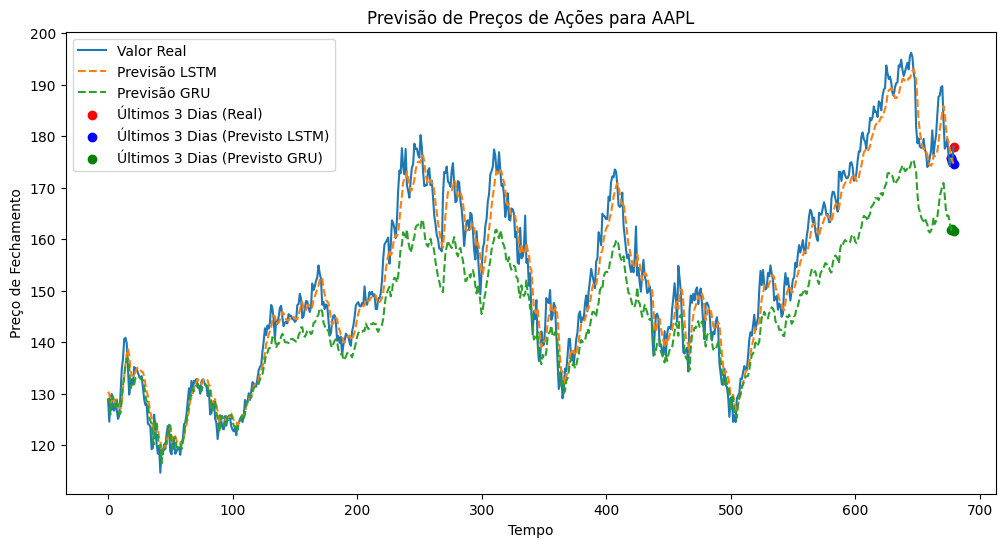

Valores Reais dos 3 Últimos Dias:
[[175.74000549]
 [175.00999451]
 [177.97000122]]
Valores Previstos dos 3 Últimos Dias (LSTM):
[[175.75444]
 [175.26445]
 [174.6385 ]]
Valores Previstos dos 3 Últimos Dias (GRU):
[[161.8287 ]
 [161.93211]
 [161.59581]]


In [23]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotUniform

# Defina o ticker da ação e o período desejado
ticker = "AAPL"  # Exemplo: Apple Inc.
start_date = "2010-01-01"
end_date = "2023-09-19"

# Obtenha os dados de preços da ação usando yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Extraia as colunas relevantes (geralmente 'Adj Close' é usada)
data = data[['Adj Close']]

# Normalização dos dados para um intervalo entre 0 e 1
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data[['Adj Close']])

# Divida os dados em treinamento e teste
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Função para preparar os dados para a modelagem
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Defina o número de etapas de tempo e prepare os dados
time_steps = 10  # Você pode ajustar isso conforme necessário
X_train, y_train = prepare_data(train_data.values, time_steps)
X_test, y_test = prepare_data(test_data.values, time_steps)

# Inicialização dos pesos iguais para os dois modelos
initializer = GlorotUniform(seed=42)

# Construa um modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1), kernel_initializer=initializer))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Construa um modelo GRU
model_gru = Sequential()
model_gru.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], 1), kernel_initializer=initializer))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Treine ambos os modelos
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
print('-'*100)
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Faça previsões nos conjuntos de teste para ambos os modelos
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)

# Inverta a normalização nas previsões e nos valores reais
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_pred_gru = scaler.inverse_transform(y_pred_gru)
y_test = scaler.inverse_transform(y_test)

# Recupere os valores reais e previstos dos 3 últimos dias para ambos os modelos
last_3_real = y_test[-3:]
last_3_pred_lstm = y_pred_lstm[-3:]
last_3_pred_gru = y_pred_gru[-3:]

# Plote os resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valor Real')
plt.plot(y_pred_lstm, label='Previsão LSTM', linestyle='dashed')
plt.plot(y_pred_gru, label='Previsão GRU', linestyle='dashed')
plt.scatter(range(len(y_test) - 3, len(y_test)), last_3_real, c='red', label='Últimos 3 Dias (Real)')
plt.scatter(range(len(y_test) - 3, len(y_test)), last_3_pred_lstm, c='blue', label='Últimos 3 Dias (Previsto LSTM)')
plt.scatter(range(len(y_test) - 3, len(y_test)), last_3_pred_gru, c='green', label='Últimos 3 Dias (Previsto GRU)')
plt.legend()
plt.title(f'Previsão de Preços de Ações para {ticker}')
plt.xlabel('Tempo')
plt.ylabel('Preço de Fechamento')
plt.show()

# Exibir os valores reais e previstos dos 3 últimos dias para ambos os modelos
print("Valores Reais dos 3 Últimos Dias:")
print(last_3_real)
print("Valores Previstos dos 3 Últimos Dias (LSTM):")
print(last_3_pred_lstm)
print("Valores Previstos dos 3 Últimos Dias (GRU):")
print(last_3_pred_gru)
